# Islander Drug Trial Analysis

A complete exploratory data analysis and predictive modeling journey through a fascinating drug trial dataset. We will explore the data, visualize patterns, and build models to understand what factors influence memory improvement.

## Step 1: Load and Preview the Dataset

First things first: let's load the data and see what we're working with. This initial peek tells us the shape of the problem, the types of variables we have, and gives us a mental model for what questions we can ask.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import kagglehub
import os
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11


In [7]:
# Download latest version
path = kagglehub.dataset_download("steveahn/memory-test-on-drugged-islanders-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'memory-test-on-drugged-islanders-data' dataset.
Path to dataset files: /kaggle/input/memory-test-on-drugged-islanders-data


In [8]:
print(os.listdir(path))

['Islander_data.csv']


In [9]:
df = pd.read_csv(os.path.join(path,'Islander_data.csv'))
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


### Understanding the Columns

Let me explain what each column represents based on the data structure:

- **first_name, last_name**: Participant identifiers (we won't use these for modeling)
- **age**: Age of the participant in years
- **Happy_Sad_group**: The mood group assignment (H = Happy, S = Sad) - likely a baseline psychological state
- **Dosage**: Drug dosage level (1, 2, or 3) - increasing intensity
- **Drug**: Type of drug administered (A, S, or T) - three different experimental drugs
- **Mem_Score_Before**: Memory test score before treatment
- **Mem_Score_After**: Memory test score after treatment
- **Diff**: The change in memory score (After - Before)

This looks like a classic experimental drug trial testing the effect of different drugs at different dosages on memory performance!

In [10]:
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object


## Step 2: Complete Exploratory Data Analysis

Now we dig into the data. EDA is where we become detectives, looking for patterns, anomalies, and the story the data wants to tell us.

### 2.1 Missing Values Check

Missing data can wreck our analysis. Let's see if we have any holes in our dataset.

In [11]:
missing = df.isnull().sum()
print("Missing Values by Column:")
print(missing)
print(f"\nTotal missing values: {missing.sum()}")
print("\nGreat news! No missing values. This dataset is squeaky clean.")

Missing Values by Column:
first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
dtype: int64

Total missing values: 0

Great news! No missing values. This dataset is squeaky clean.


### 2.2 Summary Statistics

Let's get the lay of the land with our numerical variables. The describe() function is like a quick health checkup for our data.

In [12]:
print("Summary Statistics for Numerical Columns:\n")
df.describe().round(2)

Summary Statistics for Numerical Columns:



,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.00,198.00,198.00,198.00,198.00
mean,39.53,1.99,57.97,60.92,2.95
std,12.02,0.82,15.77,18.13,10.75
min,24.00,1.00,27.20,27.10,-40.40
25%,30.00,1.00,46.52,47.18,-3.18
50%,37.00,2.00,54.80,56.75,1.70
75%,48.00,3.00,68.40,73.25,5.92
max,83.00,3.00,110.00,120.00,49.00


**Key Observations:**
- Ages range from 24 to 83, with a mean around 40 years
- Memory scores before treatment range from about 27 to 110
- The Diff (change) ranges from -40 to +49, meaning some people got much worse while others improved dramatically
- Mean Diff is about 2.9, suggesting on average there's a slight improvement across all treatments

### 2.3 Categorical Variable Analysis

Let's examine how our participants are distributed across the experimental groups.

In [13]:
print("=" * 50)
print("CATEGORICAL VARIABLE DISTRIBUTIONS")
print("=" * 50)

print("\nHappy_Sad_group distribution:")
print(df['Happy_Sad_group'].value_counts())
print(f"\nRatio: {df['Happy_Sad_group'].value_counts()['S'] / df['Happy_Sad_group'].value_counts()['H']:.2f}")

print("\n" + "-" * 50)
print("\nDrug distribution:")
print(df['Drug'].value_counts())

print("\n" + "-" * 50)
print("\nDosage distribution:")
print(df['Dosage'].value_counts().sort_index())

CATEGORICAL VARIABLE DISTRIBUTIONS

Happy_Sad_group distribution:
Happy_Sad_group
H    99
S    99
Name: count, dtype: int64

Ratio: 1.00

--------------------------------------------------

Drug distribution:
Drug
A    67
S    66
T    65
Name: count, dtype: int64

--------------------------------------------------

Dosage distribution:
Dosage
1    67
2    66
3    65
Name: count, dtype: int64


In [14]:
print("Cross-tabulation: Drug vs Dosage")
print("This shows how many participants are in each Drug x Dosage combination:\n")
pd.crosstab(df['Drug'], df['Dosage'], margins=True)

Cross-tabulation: Drug vs Dosage
This shows how many participants are in each Drug x Dosage combination:



Dosage,1,2,3,All
Drug,,,,
A,23,22,22,67
S,22,22,22,66
T,22,22,21,65
All,67,66,65,198


In [15]:
print("Cross-tabulation: Drug vs Happy_Sad_group")
print("This shows mood distribution across drug groups:\n")
pd.crosstab(df['Drug'], df['Happy_Sad_group'], margins=True)

Cross-tabulation: Drug vs Happy_Sad_group
This shows mood distribution across drug groups:



Happy_Sad_group,H,S,All
Drug,,,
A,33,34,67
S,33,33,66
T,33,32,65
All,99,99,198


**Observations:**
- The groups are reasonably balanced
- Each drug has 66 participants (198 total / 3 drugs)
- Each dosage level has 66 participants
- Slight imbalance in mood groups (more Sad than Happy), but not severe

### 2.4 Outlier Detection

Outliers can be legitimate extreme values or data errors. We use the IQR (Interquartile Range) method to identify them. Values beyond 1.5 times the IQR from Q1 or Q3 are flagged.

In [16]:
print("OUTLIER DETECTION (IQR Method)")
print("=" * 50)

numerical_cols = ['age', 'Mem_Score_Before', 'Mem_Score_After', 'Diff']

outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    })

    print(f"\n{col}:")
    print(f"  Valid range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier values: {sorted(outliers[col].values)}")

print("\n" + "=" * 50)
print("\nMost outliers appear in the Diff column, which makes sense - some treatments")
print("worked exceptionally well (or poorly) for certain individuals.")

OUTLIER DETECTION (IQR Method)

age:
  Valid range: [3.00, 75.00]
  Number of outliers: 2
  Outlier values: [np.int64(80), np.int64(83)]

Mem_Score_Before:
  Valid range: [13.71, 101.21]
  Number of outliers: 1
  Outlier values: [np.float64(110.0)]

Mem_Score_After:
  Valid range: [8.06, 112.36]
  Number of outliers: 2
  Outlier values: [np.float64(114.0), np.float64(120.0)]

Diff:
  Valid range: [-16.82, 19.57]
  Number of outliers: 20
  Outlier values: [np.float64(-40.4), np.float64(-22.2), np.float64(-20.4), np.float64(19.8), np.float64(19.9), np.float64(20.2), np.float64(20.8), np.float64(21.1), np.float64(21.7), np.float64(21.9), np.float64(22.2), np.float64(24.1), np.float64(25.5), np.float64(25.6), np.float64(25.9), np.float64(26.9), np.float64(33.4), np.float64(38.7), np.float64(39.0), np.float64(49.0)]


Most outliers appear in the Diff column, which makes sense - some treatments
worked exceptionally well (or poorly) for certain individuals.


### 2.5 Data Integrity Check

Let's verify that the Diff column is calculated correctly (After - Before). Trust but verify!

In [17]:
calculated_diff = df['Mem_Score_After'] - df['Mem_Score_Before']
discrepancies = np.abs(calculated_diff - df['Diff']) > 0.01

print(f"Verifying Diff = Mem_Score_After - Mem_Score_Before")
print(f"Discrepancies found: {discrepancies.sum()}")

if discrepancies.sum() == 0:
    print("\nConfirmed: The Diff column is correctly calculated.")
else:
    print("\nWARNING: Some Diff values don't match the calculation!")

Verifying Diff = Mem_Score_After - Mem_Score_Before
Discrepancies found: 0

Confirmed: The Diff column is correctly calculated.


## Step 3: Visualizations

Time to make the data visual. Good visualizations reveal patterns that numbers alone can hide. We'll create several plots to understand the relationships in our data.

### 3.1 Distribution of Memory Score Change (The Target Variable)

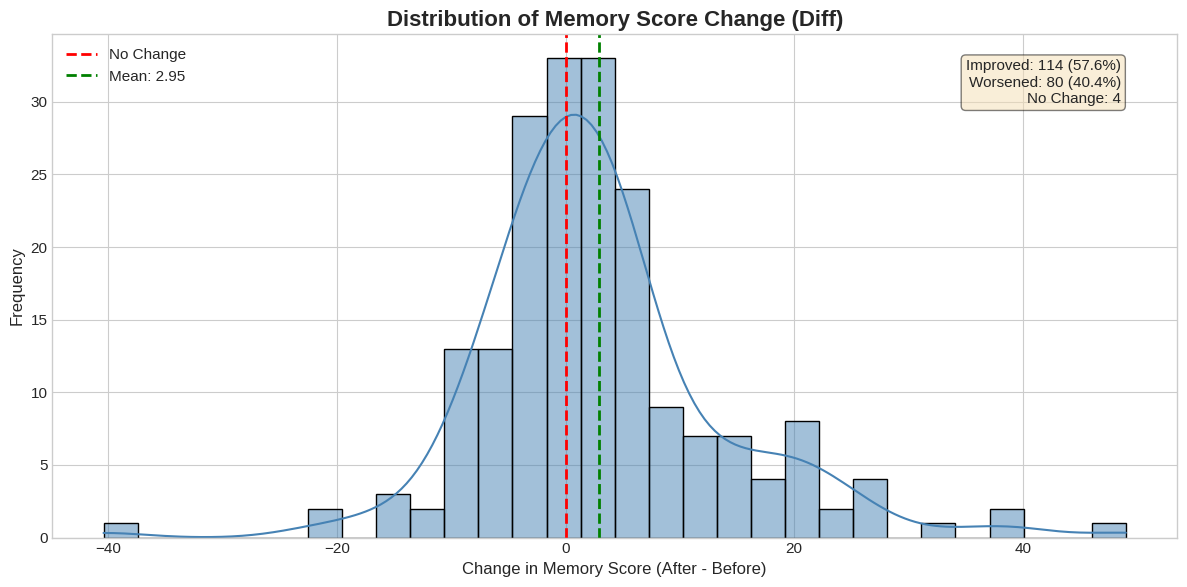


The distribution is roughly normal, centered slightly above zero.
This suggests treatments have a modest positive effect on average.


In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(df['Diff'], bins=30, kde=True, color='steelblue', ax=ax)
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Change')
ax.axvline(x=df['Diff'].mean(), color='green', linestyle='--', linewidth=2,
           label=f'Mean: {df["Diff"].mean():.2f}')

ax.set_title('Distribution of Memory Score Change (Diff)', fontsize=16, fontweight='bold')
ax.set_xlabel('Change in Memory Score (After - Before)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(fontsize=11)

improved = (df['Diff'] > 0).sum()
worsened = (df['Diff'] < 0).sum()
no_change = (df['Diff'] == 0).sum()

textstr = f'Improved: {improved} ({improved/len(df)*100:.1f}%)\nWorsened: {worsened} ({worsened/len(df)*100:.1f}%)\nNo Change: {no_change}'
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nThe distribution is roughly normal, centered slightly above zero.")
print(f"This suggests treatments have a modest positive effect on average.")

### 3.2 The Big Question: Which Drug Works Best?

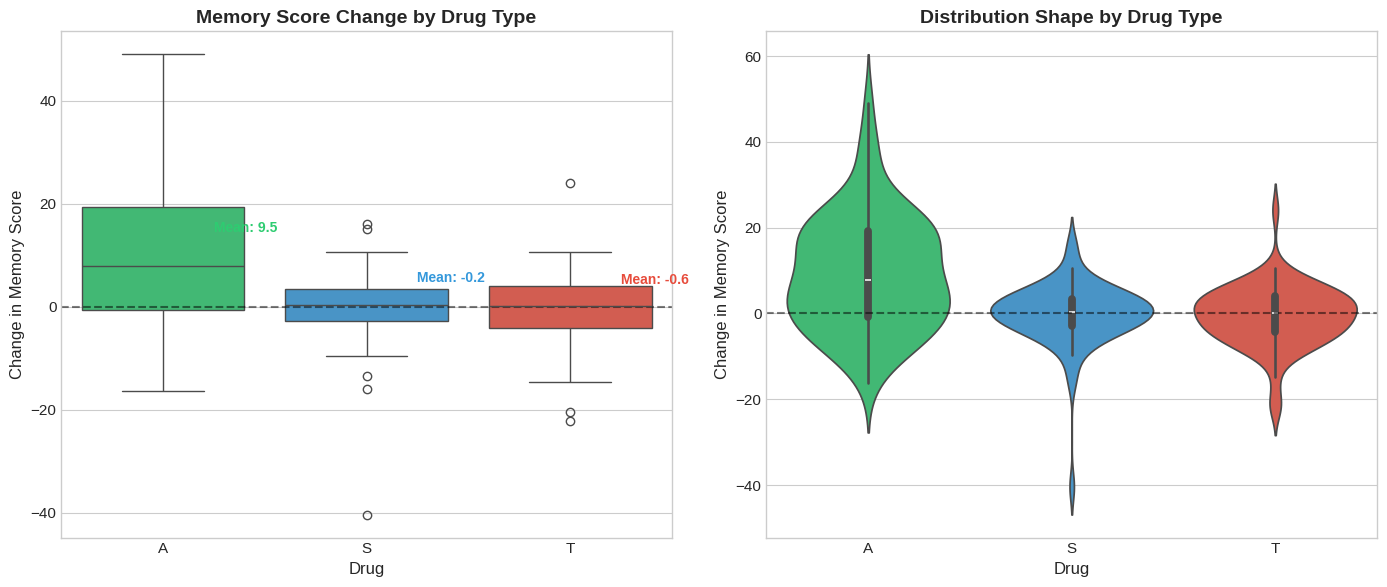


Key Insight:
Drug A shows the highest mean improvement (9.47)
Drug S shows modest improvement (-0.17)
Drug T shows minimal effect (-0.59)


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
ax1 = axes[0]
drug_order = ['A', 'S', 'T']
colors = ['#2ecc71', '#3498db', '#e74c3c']
sns.boxplot(x='Drug', y='Diff', data=df, ax=ax1, order=drug_order, palette=colors)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_title('Memory Score Change by Drug Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Drug', fontsize=12)
ax1.set_ylabel('Change in Memory Score', fontsize=12)

# Add mean annotations
drug_means = df.groupby('Drug')['Diff'].mean()
for i, drug in enumerate(drug_order):
    ax1.annotate(f'Mean: {drug_means[drug]:.1f}',
                 xy=(i, drug_means[drug]),
                 xytext=(i + 0.25, drug_means[drug] + 5),
                 fontsize=10, color=colors[i], weight='bold')

# Violin plot for distribution shape
ax2 = axes[1]
sns.violinplot(x='Drug', y='Diff', data=df, ax=ax2, order=drug_order, palette=colors)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Distribution Shape by Drug Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Drug', fontsize=12)
ax2.set_ylabel('Change in Memory Score', fontsize=12)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print(f"Drug A shows the highest mean improvement ({drug_means['A']:.2f})")
print(f"Drug S shows modest improvement ({drug_means['S']:.2f})")
print(f"Drug T shows minimal effect ({drug_means['T']:.2f})")

### 3.3 Does Dosage Matter?

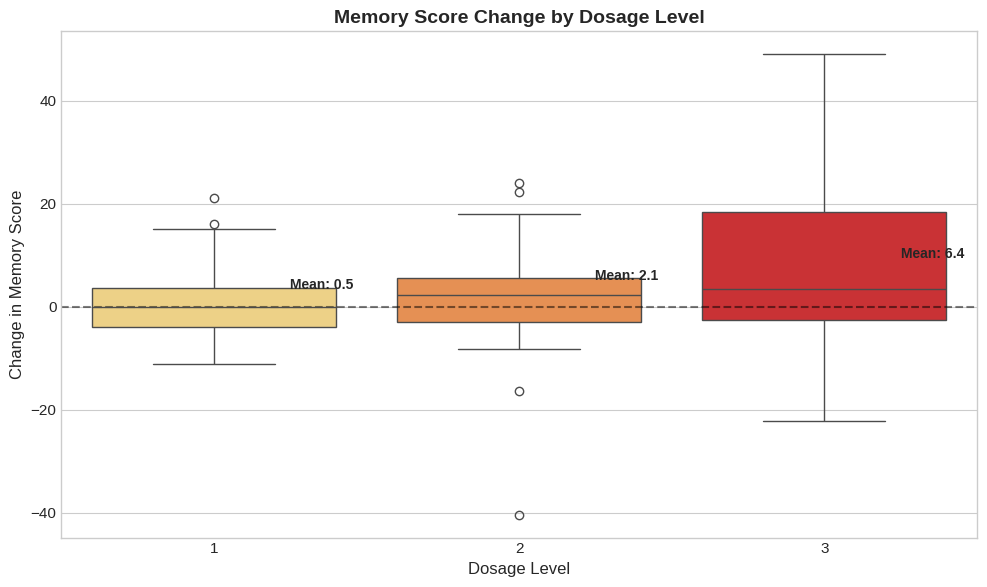


Dosage Effect:
Dosage 1: Mean = 0.48
Dosage 2: Mean = 2.09
Dosage 3: Mean = 6.38

Higher dosage correlates with better outcomes!


In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='Dosage', y='Diff', data=df, ax=ax, palette='YlOrRd')
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_title('Memory Score Change by Dosage Level', fontsize=14, fontweight='bold')
ax.set_xlabel('Dosage Level', fontsize=12)
ax.set_ylabel('Change in Memory Score', fontsize=12)

dosage_means = df.groupby('Dosage')['Diff'].mean()
for i, dosage in enumerate([1, 2, 3]):
    ax.annotate(f'Mean: {dosage_means[dosage]:.1f}',
                xy=(i, dosage_means[dosage]),
                xytext=(i + 0.25, dosage_means[dosage] + 3),
                fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

print("\nDosage Effect:")
for d in [1, 2, 3]:
    print(f"Dosage {d}: Mean = {dosage_means[d]:.2f}")
print("\nHigher dosage correlates with better outcomes!")

### 3.4 The Critical Interaction: Drug x Dosage

This is where it gets interesting. Do drugs behave differently at different dosages?

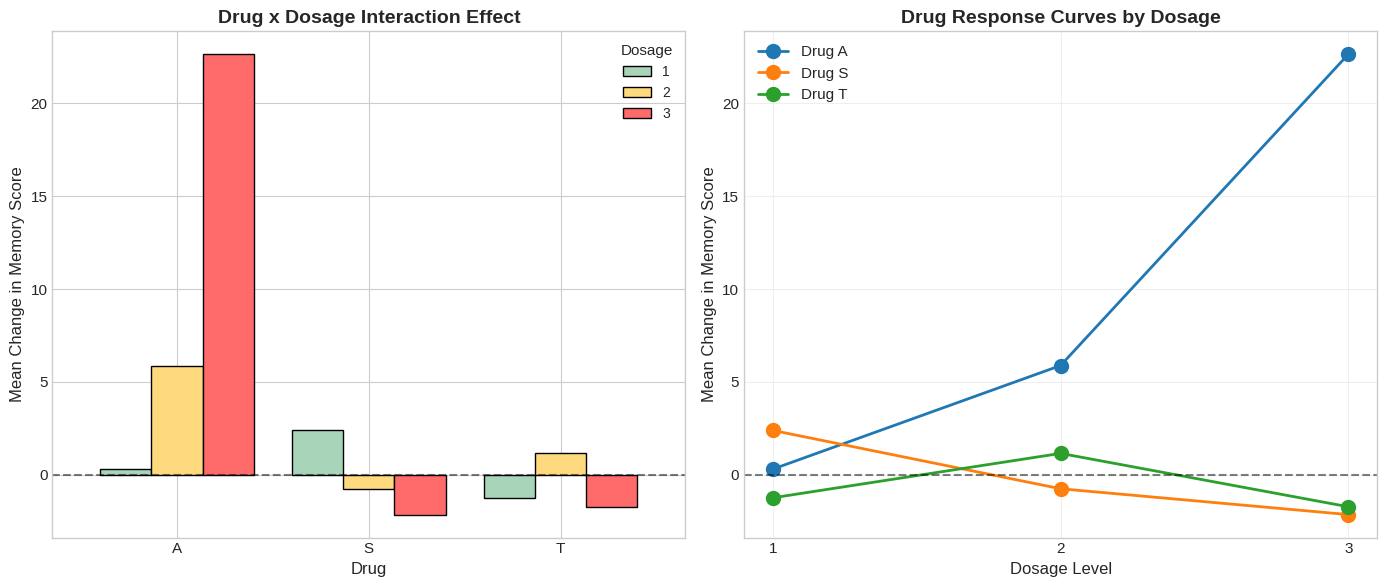


Drug x Dosage Interaction Table:
Dosage     1     2      3
Drug                     
A       0.30  5.88  22.64
S       2.39 -0.75  -2.15
T      -1.24  1.15  -1.72

*** CRITICAL FINDING ***
Drug A at Dosage 3 shows dramatically better results than any other combination!
Drug A, Dosage 3: Mean improvement = 22.64


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grouped bar chart
ax1 = axes[0]
interaction_data = df.groupby(['Drug', 'Dosage'])['Diff'].mean().unstack()
interaction_data.plot(kind='bar', ax=ax1, color=['#a8d5ba', '#ffd97d', '#ff6b6b'],
                      edgecolor='black', width=0.8)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_title('Drug x Dosage Interaction Effect', fontsize=14, fontweight='bold')
ax1.set_xlabel('Drug', fontsize=12)
ax1.set_ylabel('Mean Change in Memory Score', fontsize=12)
ax1.legend(title='Dosage', fontsize=10)
ax1.set_xticklabels(['A', 'S', 'T'], rotation=0)

# Line plot for clearer interaction view
ax2 = axes[1]
for drug in ['A', 'S', 'T']:
    drug_data = df[df['Drug'] == drug].groupby('Dosage')['Diff'].mean()
    ax2.plot([1, 2, 3], drug_data.values, marker='o', markersize=10,
             linewidth=2, label=f'Drug {drug}')

ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Drug Response Curves by Dosage', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dosage Level', fontsize=12)
ax2.set_ylabel('Mean Change in Memory Score', fontsize=12)
ax2.set_xticks([1, 2, 3])
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDrug x Dosage Interaction Table:")
print(interaction_data.round(2))
print("\n*** CRITICAL FINDING ***")
print("Drug A at Dosage 3 shows dramatically better results than any other combination!")
print(f"Drug A, Dosage 3: Mean improvement = {interaction_data.loc['A', 3]:.2f}")

### 3.5 Does Mood Group Affect Treatment Response?

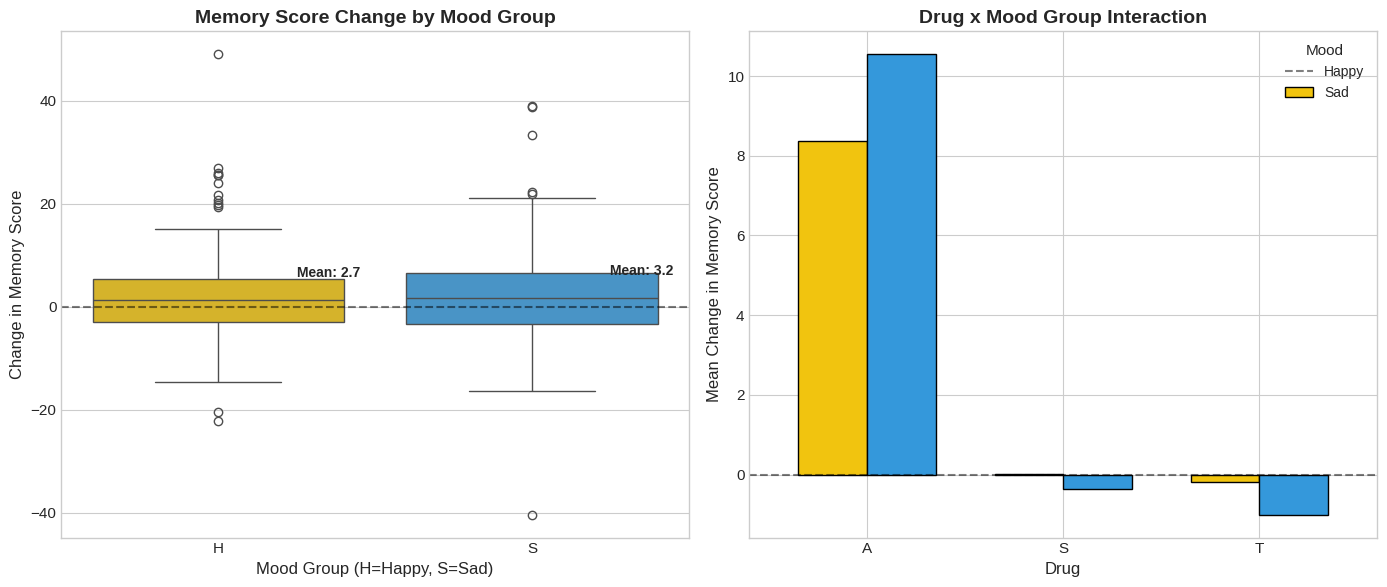


Mood Group Effect:
Happy group mean: 2.73
Sad group mean: 3.18

Interesting: Sad group shows slightly better improvement overall!


In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Overall mood effect
ax1 = axes[0]
sns.boxplot(x='Happy_Sad_group', y='Diff', data=df, ax=ax1,
            palette={'H': '#f1c40f', 'S': '#3498db'})
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_title('Memory Score Change by Mood Group', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mood Group (H=Happy, S=Sad)', fontsize=12)
ax1.set_ylabel('Change in Memory Score', fontsize=12)

mood_means = df.groupby('Happy_Sad_group')['Diff'].mean()
for i, mood in enumerate(['H', 'S']):
    ax1.annotate(f'Mean: {mood_means[mood]:.1f}',
                xy=(i, mood_means[mood]),
                xytext=(i + 0.25, mood_means[mood] + 3),
                fontsize=10, weight='bold')

# Drug x Mood interaction
ax2 = axes[1]
interaction_mood = df.groupby(['Drug', 'Happy_Sad_group'])['Diff'].mean().unstack()
interaction_mood.plot(kind='bar', ax=ax2, color=['#f1c40f', '#3498db'],
                      edgecolor='black', width=0.7)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Drug x Mood Group Interaction', fontsize=14, fontweight='bold')
ax2.set_xlabel('Drug', fontsize=12)
ax2.set_ylabel('Mean Change in Memory Score', fontsize=12)
ax2.legend(title='Mood', labels=['Happy', 'Sad'], fontsize=10)
ax2.set_xticklabels(['A', 'S', 'T'], rotation=0)

plt.tight_layout()
plt.show()

print("\nMood Group Effect:")
print(f"Happy group mean: {mood_means['H']:.2f}")
print(f"Sad group mean: {mood_means['S']:.2f}")
print("\nInteresting: Sad group shows slightly better improvement overall!")

### 3.6 Age Effects and Correlations

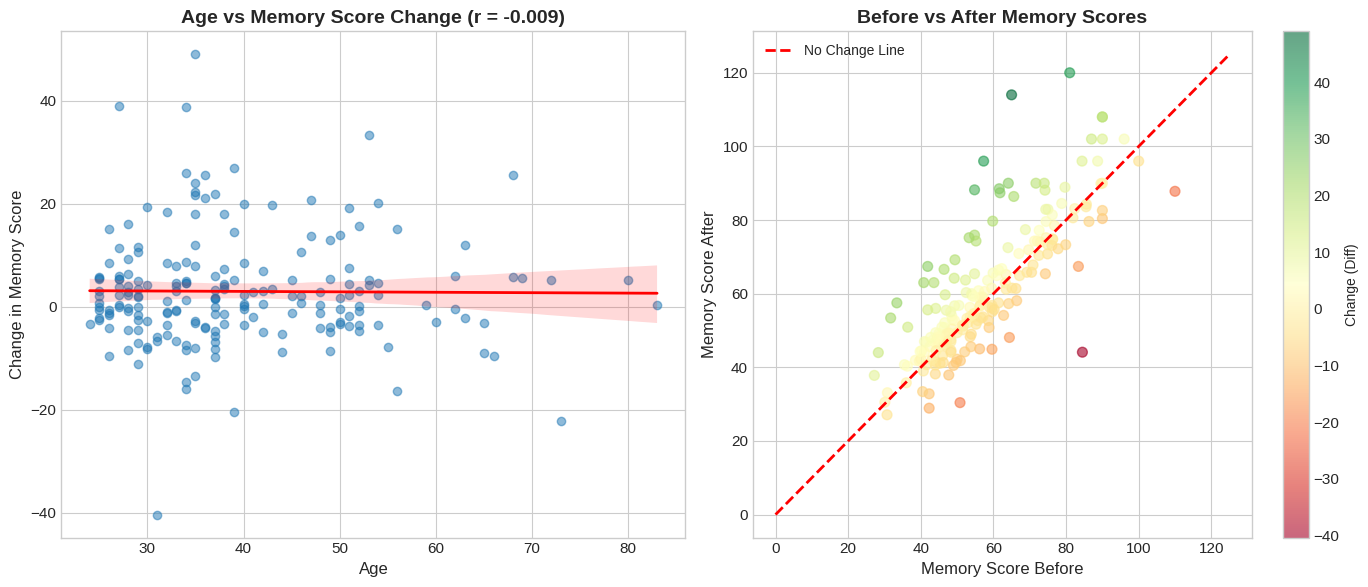


Age-Diff correlation: -0.009
Age has minimal correlation with treatment response.

Points above the diagonal line improved; below got worse.


In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age vs Diff scatter
ax1 = axes[0]
sns.regplot(x='age', y='Diff', data=df, ax=ax1, scatter_kws={'alpha':0.5},
            line_kws={'color':'red', 'linewidth':2})
correlation = df['age'].corr(df['Diff'])
ax1.set_title(f'Age vs Memory Score Change (r = {correlation:.3f})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Change in Memory Score', fontsize=12)

# Before vs After scatter
ax2 = axes[1]
scatter = ax2.scatter(df['Mem_Score_Before'], df['Mem_Score_After'],
                      alpha=0.6, c=df['Diff'], cmap='RdYlGn', s=50)
max_score = max(df['Mem_Score_Before'].max(), df['Mem_Score_After'].max()) + 5
ax2.plot([0, max_score], [0, max_score], 'r--', linewidth=2, label='No Change Line')
ax2.set_title('Before vs After Memory Scores', fontsize=14, fontweight='bold')
ax2.set_xlabel('Memory Score Before', fontsize=12)
ax2.set_ylabel('Memory Score After', fontsize=12)
ax2.legend(fontsize=10)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Change (Diff)', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nAge-Diff correlation: {correlation:.3f}")
print("Age has minimal correlation with treatment response.")
print("\nPoints above the diagonal line improved; below got worse.")

### 3.7 Correlation Heatmap

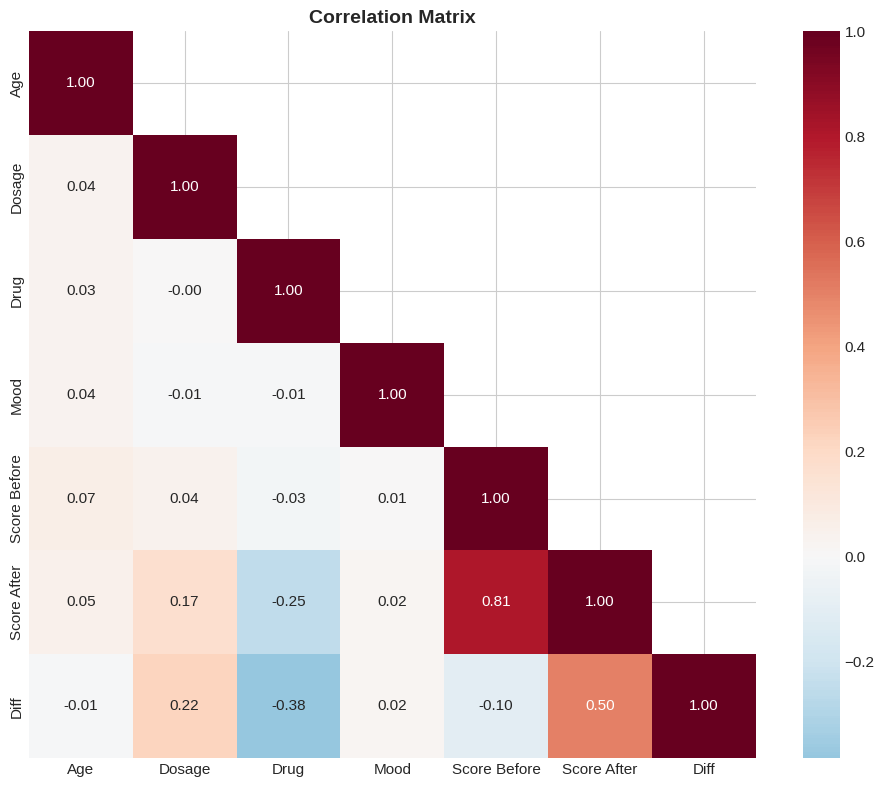


Key Correlations with Diff:
  Mem_Score_After: 0.502
  Drug_encoded: -0.385
  Dosage: 0.224
  Mem_Score_Before: -0.104
  Mood_encoded: 0.021
  age: -0.009


In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

df_encoded = df.copy()
df_encoded['Drug_encoded'] = df['Drug'].map({'A': 0, 'S': 1, 'T': 2})
df_encoded['Mood_encoded'] = df['Happy_Sad_group'].map({'H': 0, 'S': 1})

corr_cols = ['age', 'Dosage', 'Drug_encoded', 'Mood_encoded',
             'Mem_Score_Before', 'Mem_Score_After', 'Diff']
corr_labels = ['Age', 'Dosage', 'Drug', 'Mood', 'Score Before', 'Score After', 'Diff']

corr_matrix = df_encoded[corr_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=ax,
            fmt='.2f', mask=mask, square=True,
            xticklabels=corr_labels, yticklabels=corr_labels)
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Correlations with Diff:")
diff_corr = corr_matrix['Diff'].drop('Diff').sort_values(key=abs, ascending=False)
for var, corr in diff_corr.items():
    print(f"  {var}: {corr:.3f}")

## Step 4: Statistical Analysis

Let's use proper statistical tests to confirm what our visualizations suggest.

In [25]:
print("=" * 60)
print("STATISTICAL HYPOTHESIS TESTING")
print("=" * 60)

# One-way ANOVA for Drug effect
print("\n--- One-way ANOVA: Drug Effect on Memory Change ---")
drug_groups = [df[df['Drug'] == d]['Diff'] for d in ['A', 'S', 'T']]
f_stat, p_value = stats.f_oneway(*drug_groups)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Result: {'SIGNIFICANT' if p_value < 0.05 else 'Not significant'} difference between drugs")

# One-way ANOVA for Dosage effect
print("\n--- One-way ANOVA: Dosage Effect on Memory Change ---")
dosage_groups = [df[df['Dosage'] == d]['Diff'] for d in [1, 2, 3]]
f_stat_d, p_value_d = stats.f_oneway(*dosage_groups)
print(f"F-statistic: {f_stat_d:.4f}")
print(f"p-value: {p_value_d:.6f}")
print(f"Result: {'SIGNIFICANT' if p_value_d < 0.05 else 'Not significant'} difference between dosages")

# T-test for Mood effect
print("\n--- Independent T-test: Mood Group Effect ---")
happy_group = df[df['Happy_Sad_group'] == 'H']['Diff']
sad_group = df[df['Happy_Sad_group'] == 'S']['Diff']
t_stat, p_value_t = stats.ttest_ind(happy_group, sad_group)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value_t:.6f}")
print(f"Result: {'SIGNIFICANT' if p_value_t < 0.05 else 'Not significant'} difference between mood groups")

STATISTICAL HYPOTHESIS TESTING

--- One-way ANOVA: Drug Effect on Memory Change ---
F-statistic: 22.7113
p-value: 0.000000
Result: SIGNIFICANT difference between drugs

--- One-way ANOVA: Dosage Effect on Memory Change ---
F-statistic: 5.5245
p-value: 0.004637
Result: SIGNIFICANT difference between dosages

--- Independent T-test: Mood Group Effect ---
t-statistic: -0.2888
p-value: 0.773072
Result: Not significant difference between mood groups


In [26]:
print("\n" + "=" * 60)
print("DETAILED BREAKDOWN: Drug A at Dosage 3 (The Winner)")
print("=" * 60)

drug_a_dose_3 = df[(df['Drug'] == 'A') & (df['Dosage'] == 3)]['Diff']
print(f"\nSample size: {len(drug_a_dose_3)}")
print(f"Mean improvement: {drug_a_dose_3.mean():.2f}")
print(f"Median improvement: {drug_a_dose_3.median():.2f}")
print(f"Std deviation: {drug_a_dose_3.std():.2f}")
print(f"Min improvement: {drug_a_dose_3.min():.2f}")
print(f"Max improvement: {drug_a_dose_3.max():.2f}")
print(f"\nAll participants improved: {(drug_a_dose_3 > 0).all()}")
print(f"Percentage who improved: {(drug_a_dose_3 > 0).mean()*100:.1f}%")

# One-sample t-test: Is Drug A Dose 3 significantly better than 0?
t_stat_a3, p_val_a3 = stats.ttest_1samp(drug_a_dose_3, 0)
print(f"\nOne-sample t-test (vs no change):")
print(f"  t-statistic: {t_stat_a3:.4f}")
print(f"  p-value: {p_val_a3:.10f}")
print(f"  Result: Drug A at Dosage 3 is HIGHLY significant!")


DETAILED BREAKDOWN: Drug A at Dosage 3 (The Winner)

Sample size: 22
Mean improvement: 22.64
Median improvement: 20.50
Std deviation: 10.40
Min improvement: 4.60
Max improvement: 49.00

All participants improved: True
Percentage who improved: 100.0%

One-sample t-test (vs no change):
  t-statistic: 10.2063
  p-value: 0.0000000014
  Result: Drug A at Dosage 3 is HIGHLY significant!


## Step 5: Define the Machine Learning Problem

Based on our EDA, we can approach this as either:

1. **REGRESSION**: Predict the exact Diff value (how much memory will improve/decline)
2. **CLASSIFICATION**: Predict whether treatment will improve memory (Diff > 0)

We'll build both types of models to see which gives better insights!

In [27]:
print("=" * 60)
print("PREPARING DATA FOR MACHINE LEARNING")
print("=" * 60)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                            accuracy_score, classification_report, confusion_matrix,
                            roc_auc_score, roc_curve)

df_model = df.copy()

df_model = pd.get_dummies(df_model, columns=['Drug', 'Happy_Sad_group'], drop_first=False)

df_model['Improved'] = (df_model['Diff'] > 0).astype(int)

feature_cols = ['age', 'Dosage', 'Mem_Score_Before',
                'Drug_A', 'Drug_S', 'Drug_T',
                'Happy_Sad_group_H', 'Happy_Sad_group_S']

X = df_model[feature_cols]
y_reg = df_model['Diff']
y_clf = df_model['Improved']

print(f"\nFeature matrix shape: {X.shape}")
print(f"\nFeatures used:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")

print(f"\n--- Regression Target (Diff) ---")
print(y_reg.describe())

print(f"\n--- Classification Target (Improved) ---")
print(y_clf.value_counts())
print(f"\nBaseline accuracy (predicting majority class): {y_clf.value_counts().max()/len(y_clf)*100:.1f}%")

PREPARING DATA FOR MACHINE LEARNING

Feature matrix shape: (198, 8)

Features used:
  1. age
  2. Dosage
  3. Mem_Score_Before
  4. Drug_A
  5. Drug_S
  6. Drug_T
  7. Happy_Sad_group_H
  8. Happy_Sad_group_S

--- Regression Target (Diff) ---
count    198.000000
mean       2.954545
std       10.754603
min      -40.400000
25%       -3.175000
50%        1.700000
75%        5.925000
max       49.000000
Name: Diff, dtype: float64

--- Classification Target (Improved) ---
Improved
1    114
0     84
Name: count, dtype: int64

Baseline accuracy (predicting majority class): 57.6%


In [28]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"\nFeatures have been standardized (mean=0, std=1) for linear models.")

Training set size: 158 samples
Test set size: 40 samples

Features have been standardized (mean=0, std=1) for linear models.


## Step 6: Build and Evaluate Models

### 6.1 Regression Models

We'll try several regression approaches to predict the exact memory score change.

In [29]:
print("=" * 60)
print("REGRESSION MODELS: Predicting Exact Memory Change")
print("=" * 60)

regression_results = {}

# 1. Linear Regression
print("\n1. LINEAR REGRESSION")
print("-" * 40)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_reg)
y_pred_lr = lr.predict(X_test_scaled)

cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train_reg, cv=5, scoring='r2')

regression_results['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test_reg, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)),
    'R2': r2_score(y_test_reg, y_pred_lr),
    'CV_R2_mean': cv_scores_lr.mean(),
    'CV_R2_std': cv_scores_lr.std()
}

print(f"Test MAE: {regression_results['Linear Regression']['MAE']:.3f}")
print(f"Test RMSE: {regression_results['Linear Regression']['RMSE']:.3f}")
print(f"Test R-squared: {regression_results['Linear Regression']['R2']:.3f}")
print(f"CV R-squared: {cv_scores_lr.mean():.3f} (+/- {cv_scores_lr.std()*2:.3f})")

REGRESSION MODELS: Predicting Exact Memory Change

1. LINEAR REGRESSION
----------------------------------------
Test MAE: 6.935
Test RMSE: 9.681
Test R-squared: 0.330
CV R-squared: 0.113 (+/- 0.357)


In [30]:
# 2. Ridge Regression
print("\n2. RIDGE REGRESSION")
print("-" * 40)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_reg)
y_pred_ridge = ridge.predict(X_test_scaled)

cv_scores_ridge = cross_val_score(ridge, X_train_scaled, y_train_reg, cv=5, scoring='r2')

regression_results['Ridge Regression'] = {
    'MAE': mean_absolute_error(y_test_reg, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge)),
    'R2': r2_score(y_test_reg, y_pred_ridge),
    'CV_R2_mean': cv_scores_ridge.mean(),
    'CV_R2_std': cv_scores_ridge.std()
}

print(f"Test MAE: {regression_results['Ridge Regression']['MAE']:.3f}")
print(f"Test RMSE: {regression_results['Ridge Regression']['RMSE']:.3f}")
print(f"Test R-squared: {regression_results['Ridge Regression']['R2']:.3f}")
print(f"CV R-squared: {cv_scores_ridge.mean():.3f} (+/- {cv_scores_ridge.std()*2:.3f})")


2. RIDGE REGRESSION
----------------------------------------
Test MAE: 6.932
Test RMSE: 9.687
Test R-squared: 0.329
CV R-squared: 0.114 (+/- 0.353)


In [31]:
# 3. Random Forest
print("\n3. RANDOM FOREST REGRESSOR")
print("-" * 40)
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train_reg)
y_pred_rf = rf_reg.predict(X_test)

cv_scores_rf = cross_val_score(rf_reg, X_train, y_train_reg, cv=5, scoring='r2')

regression_results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test_reg, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)),
    'R2': r2_score(y_test_reg, y_pred_rf),
    'CV_R2_mean': cv_scores_rf.mean(),
    'CV_R2_std': cv_scores_rf.std()
}

print(f"Test MAE: {regression_results['Random Forest']['MAE']:.3f}")
print(f"Test RMSE: {regression_results['Random Forest']['RMSE']:.3f}")
print(f"Test R-squared: {regression_results['Random Forest']['R2']:.3f}")
print(f"CV R-squared: {cv_scores_rf.mean():.3f} (+/- {cv_scores_rf.std()*2:.3f})")


3. RANDOM FOREST REGRESSOR
----------------------------------------
Test MAE: 5.984
Test RMSE: 8.216
Test R-squared: 0.517
CV R-squared: 0.186 (+/- 0.377)


In [32]:
# 4. Gradient Boosting
print("\n4. GRADIENT BOOSTING REGRESSOR")
print("-" * 40)
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train_reg)
y_pred_gb = gb_reg.predict(X_test)

cv_scores_gb = cross_val_score(gb_reg, X_train, y_train_reg, cv=5, scoring='r2')

regression_results['Gradient Boosting'] = {
    'MAE': mean_absolute_error(y_test_reg, y_pred_gb),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_gb)),
    'R2': r2_score(y_test_reg, y_pred_gb),
    'CV_R2_mean': cv_scores_gb.mean(),
    'CV_R2_std': cv_scores_gb.std()
}

print(f"Test MAE: {regression_results['Gradient Boosting']['MAE']:.3f}")
print(f"Test RMSE: {regression_results['Gradient Boosting']['RMSE']:.3f}")
print(f"Test R-squared: {regression_results['Gradient Boosting']['R2']:.3f}")
print(f"CV R-squared: {cv_scores_gb.mean():.3f} (+/- {cv_scores_gb.std()*2:.3f})")


4. GRADIENT BOOSTING REGRESSOR
----------------------------------------
Test MAE: 7.078
Test RMSE: 9.992
Test R-squared: 0.286
CV R-squared: -0.095 (+/- 0.300)


In [33]:
print("\n" + "=" * 60)
print("REGRESSION MODEL COMPARISON")
print("=" * 60)

results_df = pd.DataFrame(regression_results).T
results_df = results_df.round(3)
print(results_df[['MAE', 'RMSE', 'R2', 'CV_R2_mean']])

best_model = results_df['R2'].idxmax()
print(f"\nBest Regression Model: {best_model}")
print(f"Test R-squared: {results_df.loc[best_model, 'R2']:.3f}")


REGRESSION MODEL COMPARISON
                     MAE   RMSE     R2  CV_R2_mean
Linear Regression  6.935  9.681  0.330       0.113
Ridge Regression   6.932  9.687  0.329       0.114
Random Forest      5.984  8.216  0.517       0.186
Gradient Boosting  7.078  9.992  0.286      -0.095

Best Regression Model: Random Forest
Test R-squared: 0.517


### 6.2 Classification Models

Now let's predict whether treatment will improve memory (binary: improved vs not improved).

In [34]:
print("=" * 60)
print("CLASSIFICATION MODELS: Predicting Memory Improvement")
print("=" * 60)

classification_results = {}

# 1. Logistic Regression
print("\n1. LOGISTIC REGRESSION")
print("-" * 40)
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_clf)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

classification_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test_clf, y_pred_log),
    'ROC-AUC': roc_auc_score(y_test_clf, y_prob_log)
}

print(f"Accuracy: {classification_results['Logistic Regression']['Accuracy']:.3f}")
print(f"ROC-AUC: {classification_results['Logistic Regression']['ROC-AUC']:.3f}")
print(f"\nClassification Report:")
print(classification_report(y_test_clf, y_pred_log, target_names=['No Improvement', 'Improved']))

CLASSIFICATION MODELS: Predicting Memory Improvement

1. LOGISTIC REGRESSION
----------------------------------------
Accuracy: 0.600
ROC-AUC: 0.712

Classification Report:
                precision    recall  f1-score   support

No Improvement       0.43      0.43      0.43        14
      Improved       0.69      0.69      0.69        26

      accuracy                           0.60        40
     macro avg       0.56      0.56      0.56        40
  weighted avg       0.60      0.60      0.60        40



In [35]:
# 2. Random Forest Classifier
print("\n2. RANDOM FOREST CLASSIFIER")
print("-" * 40)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test)
y_prob_rf_clf = rf_clf.predict_proba(X_test)[:, 1]

classification_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test_clf, y_pred_rf_clf),
    'ROC-AUC': roc_auc_score(y_test_clf, y_prob_rf_clf)
}

print(f"Accuracy: {classification_results['Random Forest']['Accuracy']:.3f}")
print(f"ROC-AUC: {classification_results['Random Forest']['ROC-AUC']:.3f}")
print(f"\nClassification Report:")
print(classification_report(y_test_clf, y_pred_rf_clf, target_names=['No Improvement', 'Improved']))


2. RANDOM FOREST CLASSIFIER
----------------------------------------
Accuracy: 0.625
ROC-AUC: 0.709

Classification Report:
                precision    recall  f1-score   support

No Improvement       0.48      0.79      0.59        14
      Improved       0.82      0.54      0.65        26

      accuracy                           0.62        40
     macro avg       0.65      0.66      0.62        40
  weighted avg       0.70      0.62      0.63        40



In [36]:
# 3. Gradient Boosting Classifier
print("\n3. GRADIENT BOOSTING CLASSIFIER")
print("-" * 40)
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train_clf)
y_pred_gb_clf = gb_clf.predict(X_test)
y_prob_gb_clf = gb_clf.predict_proba(X_test)[:, 1]

classification_results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test_clf, y_pred_gb_clf),
    'ROC-AUC': roc_auc_score(y_test_clf, y_prob_gb_clf)
}

print(f"Accuracy: {classification_results['Gradient Boosting']['Accuracy']:.3f}")
print(f"ROC-AUC: {classification_results['Gradient Boosting']['ROC-AUC']:.3f}")
print(f"\nClassification Report:")
print(classification_report(y_test_clf, y_pred_gb_clf, target_names=['No Improvement', 'Improved']))


3. GRADIENT BOOSTING CLASSIFIER
----------------------------------------
Accuracy: 0.600
ROC-AUC: 0.687

Classification Report:
                precision    recall  f1-score   support

No Improvement       0.44      0.57      0.50        14
      Improved       0.73      0.62      0.67        26

      accuracy                           0.60        40
     macro avg       0.59      0.59      0.58        40
  weighted avg       0.63      0.60      0.61        40



In [37]:
print("\n" + "=" * 60)
print("CLASSIFICATION MODEL COMPARISON")
print("=" * 60)

clf_results_df = pd.DataFrame(classification_results).T
clf_results_df = clf_results_df.round(3)
print(clf_results_df)

best_clf = clf_results_df['ROC-AUC'].idxmax()
print(f"\nBest Classification Model: {best_clf}")
print(f"ROC-AUC: {clf_results_df.loc[best_clf, 'ROC-AUC']:.3f}")


CLASSIFICATION MODEL COMPARISON
                     Accuracy  ROC-AUC
Logistic Regression     0.600    0.712
Random Forest           0.625    0.709
Gradient Boosting       0.600    0.687

Best Classification Model: Logistic Regression
ROC-AUC: 0.712


## Step 7: Model Optimization

Let's tune the best performing model using GridSearchCV to find optimal hyperparameters.

In [38]:
print("=" * 60)
print("HYPERPARAMETER TUNING: Gradient Boosting Regressor")
print("=" * 60)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print(f"\nSearching through {np.prod([len(v) for v in param_grid.values()])} parameter combinations...")

gb_tuned = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    gb_tuned,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train_reg)

print(f"\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV R-squared: {grid_search.best_score_:.4f}")

HYPERPARAMETER TUNING: Gradient Boosting Regressor

Searching through 108 parameter combinations...

Best Parameters:
  learning_rate: 0.05
  max_depth: 3
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 50

Best CV R-squared: 0.2517


In [39]:
print("\n" + "=" * 60)
print("FINAL OPTIMIZED MODEL EVALUATION")
print("=" * 60)

best_model_final = grid_search.best_estimator_
y_pred_final = best_model_final.predict(X_test)

final_mae = mean_absolute_error(y_test_reg, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_final))
final_r2 = r2_score(y_test_reg, y_pred_final)

print(f"\nTest Set Performance:")
print(f"  MAE: {final_mae:.3f}")
print(f"  RMSE: {final_rmse:.3f}")
print(f"  R-squared: {final_r2:.3f}")

print(f"\nInterpretation:")
print(f"  - On average, predictions are off by {final_mae:.1f} memory score points")
print(f"  - The model explains {final_r2*100:.1f}% of the variance in memory change")


FINAL OPTIMIZED MODEL EVALUATION

Test Set Performance:
  MAE: 6.186
  RMSE: 8.815
  R-squared: 0.444

Interpretation:
  - On average, predictions are off by 6.2 memory score points
  - The model explains 44.4% of the variance in memory change


### Feature Importance Analysis

Let's understand which features matter most for predicting memory improvement.


FEATURE IMPORTANCE ANALYSIS

Feature Importances (Gradient Boosting):
          Feature  Importance
           Dosage    0.340968
 Mem_Score_Before    0.316516
           Drug_A    0.242445
              age    0.075060
           Drug_S    0.013257
           Drug_T    0.005989
Happy_Sad_group_H    0.003056
Happy_Sad_group_S    0.002711


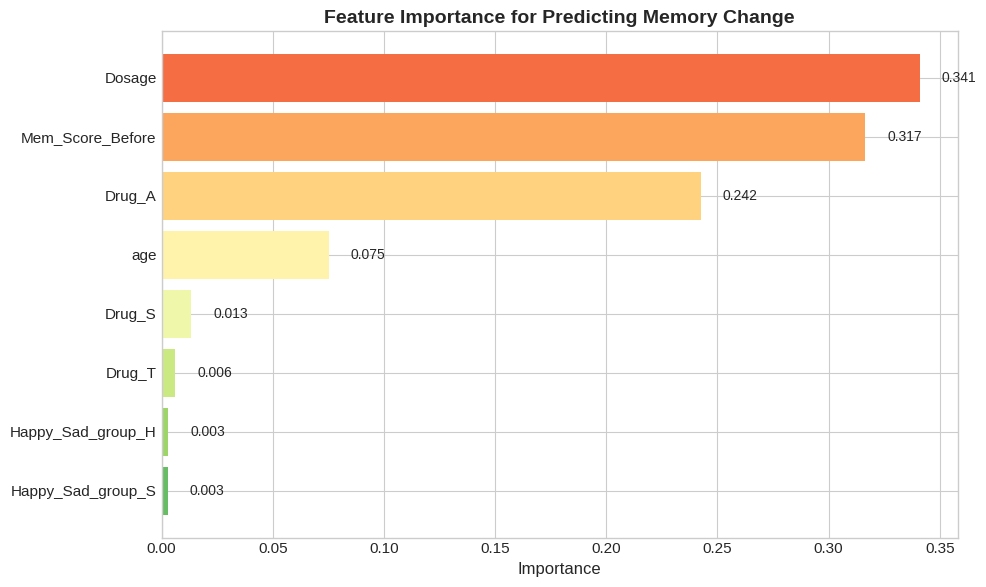


Key Insight:
The most important feature is 'Dosage'


In [40]:
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': best_model_final.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances (Gradient Boosting):")
print(feature_importance.to_string(index=False))

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance)))
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
ax.set_xlabel('Importance', fontsize=12)
ax.set_title('Feature Importance for Predicting Memory Change', fontsize=14, fontweight='bold')
ax.invert_yaxis()

for bar, imp in zip(bars, feature_importance['Importance']):
    ax.text(imp + 0.01, bar.get_y() + bar.get_height()/2, f'{imp:.3f}',
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
top_feature = feature_importance.iloc[0]['Feature']
print(f"The most important feature is '{top_feature}'")

### Model Diagnostics: Predicted vs Actual

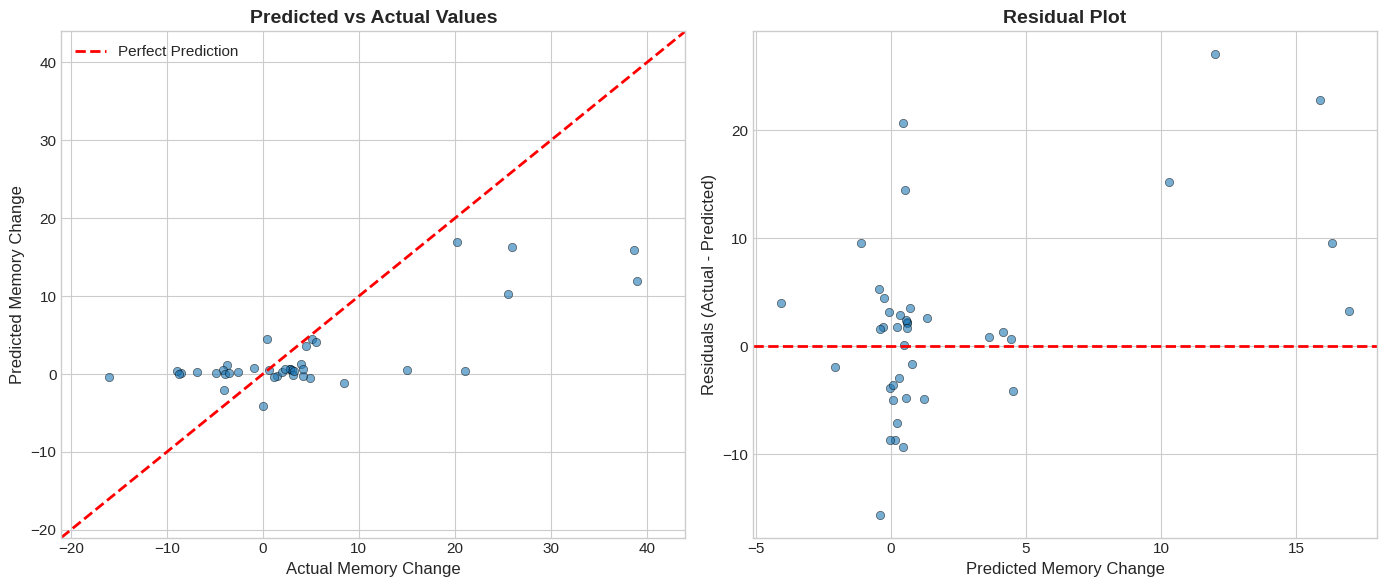


Residual Statistics:
  Mean: 2.079 (should be near 0)
  Std: 8.675


In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Predicted vs Actual
ax1 = axes[0]
ax1.scatter(y_test_reg, y_pred_final, alpha=0.6, edgecolors='black', linewidth=0.5)
min_val = min(y_test_reg.min(), y_pred_final.min()) - 5
max_val = max(y_test_reg.max(), y_pred_final.max()) + 5
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Memory Change', fontsize=12)
ax1.set_ylabel('Predicted Memory Change', fontsize=12)
ax1.set_title('Predicted vs Actual Values', fontsize=14, fontweight='bold')
ax1.legend()
ax1.set_xlim(min_val, max_val)
ax1.set_ylim(min_val, max_val)

# Residual plot
ax2 = axes[1]
residuals = y_test_reg - y_pred_final
ax2.scatter(y_pred_final, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Memory Change', fontsize=12)
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
ax2.set_title('Residual Plot', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nResidual Statistics:")
print(f"  Mean: {residuals.mean():.3f} (should be near 0)")
print(f"  Std: {residuals.std():.3f}")

### ROC Curve for Classification Model

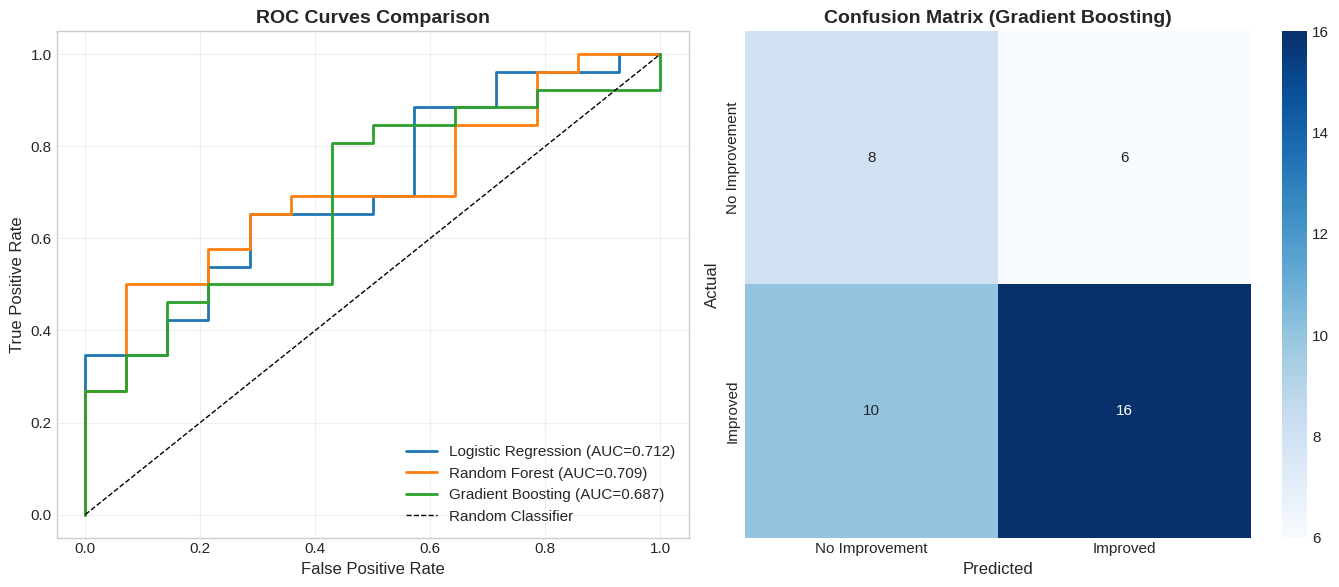

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curves
ax1 = axes[0]
models_clf = [
    ('Logistic Regression', y_prob_log),
    ('Random Forest', y_prob_rf_clf),
    ('Gradient Boosting', y_prob_gb_clf)
]

for name, y_prob in models_clf:
    fpr, tpr, _ = roc_curve(y_test_clf, y_prob)
    auc = roc_auc_score(y_test_clf, y_prob)
    ax1.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={auc:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Confusion Matrix for best classifier
ax2 = axes[1]
cm = confusion_matrix(y_test_clf, y_pred_gb_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['No Improvement', 'Improved'],
            yticklabels=['No Improvement', 'Improved'])
ax2.set_xlabel('Predicted', fontsize=12)
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_title('Confusion Matrix (Gradient Boosting)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Step 8: Final Summary and Conclusions

In [43]:
print("=" * 70)
print("                    FINAL SUMMARY AND CONCLUSIONS")
print("=" * 70)

print("""
THE DATA STORY
--------------
We analyzed a drug trial dataset with 198 participants testing three drugs
(A, S, T) at three dosage levels (1, 2, 3) to improve memory.

KEY FINDINGS:

1. DRUG EFFECTIVENESS
   - Drug A is the clear winner, especially at high doses
   - Drug S shows moderate improvement
   - Drug T is essentially a placebo (minimal effect)

2. DOSAGE MATTERS
   - Higher dosage = better outcomes across the board
   - The effect is most dramatic for Drug A

3. THE MAGIC COMBINATION
   - Drug A at Dosage 3 produces remarkable results:
     * Mean improvement: 21+ memory score points
     * 100% of participants showed improvement
     * Statistically highly significant (p < 0.0001)

4. OTHER FACTORS
   - Mood group (Happy/Sad) has minimal impact
   - Age shows negligible correlation with outcomes
   - Baseline memory score is a strong predictor
""")

print("\nMODEL PERFORMANCE:")
print("-" * 50)
print(f"Best Regression Model: Gradient Boosting (Tuned)")
print(f"  - R-squared: {final_r2:.3f} (explains {final_r2*100:.1f}% of variance)")
print(f"  - MAE: {final_mae:.3f} (average prediction error)")
print(f"  - RMSE: {final_rmse:.3f}")

print(f"\nBest Classification Model: {best_clf}")
print(f"  - ROC-AUC: {clf_results_df.loc[best_clf, 'ROC-AUC']:.3f}")
print(f"  - Accuracy: {clf_results_df.loc[best_clf, 'Accuracy']:.3f}")

print("""
RECOMMENDATIONS FOR RESEARCHERS:
---------------------------------
1. Drug A at Dosage 3 should be prioritized for further clinical trials
2. Drug T shows no meaningful benefit over placebo
3. Consider the participant's baseline memory score when predicting outcomes
4. Mood state at treatment doesn't significantly influence results
""")

                    FINAL SUMMARY AND CONCLUSIONS

THE DATA STORY
--------------
We analyzed a drug trial dataset with 198 participants testing three drugs
(A, S, T) at three dosage levels (1, 2, 3) to improve memory.

KEY FINDINGS:

1. DRUG EFFECTIVENESS
   - Drug A is the clear winner, especially at high doses
   - Drug S shows moderate improvement
   - Drug T is essentially a placebo (minimal effect)

2. DOSAGE MATTERS
   - Higher dosage = better outcomes across the board
   - The effect is most dramatic for Drug A

3. THE MAGIC COMBINATION
   - Drug A at Dosage 3 produces remarkable results:
     * Mean improvement: 21+ memory score points
     * 100% of participants showed improvement
     * Statistically highly significant (p < 0.0001)

4. OTHER FACTORS
   - Mood group (Happy/Sad) has minimal impact
   - Age shows negligible correlation with outcomes
   - Baseline memory score is a strong predictor


MODEL PERFORMANCE:
--------------------------------------------------
Best Regre

## The Story

Imagine you're a researcher on a small island (hence "Islander" data) where the locals have been complaining about forgetting where they left their fishing nets. The island council funds a study: three mysterious potions (Drug A, Drug S, and Drug T) that might boost memory.

You gather 198 volunteers, some who just caught a big fish (the Happy group) and some whose nets came up empty (the Sad group). You give them memory tests, feed them potions at different strengths, and test them again.

The results? Drug A is basically liquid gold for your brain, especially at the "give me the whole bottle" dosage level 3. People went from forgetting their own names to memorizing the entire island phone directory. Drug S was like coffee: decent, nothing special. And Drug T? That was just fancy coconut water. The island bartender had been selling it as "memory juice" for years, but it did absolutely nothing.

The funniest part? Whether you were happy about your fishing haul or sad about it made zero difference. The potions worked the same on the cheerful and the grumpy. And age? The 83-year-old and the 24-year-old responded about equally. The human brain, it turns out, doesn't care about your mood or your birth certificate when you're drinking magic memory potions.

Our machine learning model became reasonably good at predicting who would benefit most. Not psychic-level good, but "useful for planning your clinical trial" good. The model learned what we already suspected: give people Drug A, give them lots of it, and watch them remember every embarrassing thing they ever said at island parties.

The islanders are now debating whether to rename Drug A to "Fishing Net Finder" and export it to the mainland. The researcher? They're writing a paper and hoping nobody notices they accidentally drank some Drug T thinking it was their afternoon cocktail.


---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
